# Exploration of Nuclear Incidents

### We are going to perform an explorative analysis of Nuclear Incidents around the World from 2013 to 2019 using CNS database downloaded from the following link: https://www.nti.org/analysis/articles/cns-global-incidents-and-trafficking-database/

**Now let's start.....!!!**

In [1]:
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np
#pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
import pandas as pd
#Plotly is a package used to plot different graphs
import calendar
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


In [2]:
#Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
import matplotlib as mpl
import matplotlib.pyplot as plt # For base plotting

In [3]:
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns # Easier plotting



In [4]:
# Misc
import os

In [5]:
## To Show graphs in same window
%matplotlib inline

In [7]:
# Setting up Matplotlib, Seaborn map styles
mpl.style.use("seaborn")
plt.style.use("seaborn")

btui = [
    "#b2182b", "#d6604d", "#f4a582", "#92c5de", "#4393c3", "#2166ac", "#762a83",
    "#9970ab", "#c2a5cf", "#a6dba0", "#5aae61", "#1b7837", "#c51b7d", "#de77ae",
    "#f1b6da", "#8c510a", "#bf812d", "#dfc27d", "#80cdc1", "#35978f", "#01665e",
    ]
import random
btui_reversed = btui[::-1]
btui_shuffled=random.sample(btui, len(btui))

#sns.set(context="notebook", style="darkgrid", font="monospace", font_scale=1.5, palette=btui)
sns.color_palette(btui)
sns.set_palette(btui)
sns.set(rc={"figure.figsize": (14, 10)})

In [60]:
# Read file
file_name = 'C:/Users/cv1/Downloads/global_incidents_and_trafficking.csv'
incidents = pd.read_csv(file_name, encoding = "ISO-8859-1")

In [61]:
# Explore data - First 5 records 
incidents.head()                          # head()

,Date Occurred,Date Reported,Date Input/ Updated,Brief Description,Type of Incident,Method of Detection,Recovered,In Transport,"If Stolen, Further Classifciation","If Stolen, Attended/Unattended",...,Quantity,Activity,Enrichment,Region,Country,State/Province,City,Persons Involved,Source,Entry Code
0,2/8/2017,2/9/2017,2/20/2017,The Wisconsin Department of Health Services R...,Unauthorized Possession,Radiation monitoring,Accidental find,Unknown,NaN,NaN,...,1.0,150 mCi,NaN,North America,USA,Wisconsin,Neenah,NaN,https://www.nrc.gov/reading-rm/doc-collections...,2017017.0
1,19-Jun-15,29-Jun-15,23-Jul-15,1.4 mCi of I123 went missing during shipment f...,Delivery failure/Misrouting,Delivery failure,No,"Yes, but unknown whether in movement or not",NaN,NaN,...,0.0,1.4 mCi,NaN,North America,USA,Missouri,Maryland Heights,Unknown,http://www.nrc.gov/reading-rm/doc-collections/...,2015450.0
2,13-Jul-16,20-Jul-16,29-Jul-16,10 Tritium exit signs were shipped to the lice...,Loss,Discovery of theft,No,No,NaN,NaN,...,1.0,10 Ci,NaN,North America,USA,Colorado,Trinidad,NaN,http://www.nrc.gov/reading-rm/doc-collections/...,2016644.0
3,9-Feb-15,13-Mar-15,18-Jun-15,13 sealed radioactives sources were found at t...,Unknown,"Found by chance, internal","Recovered, circumstances unknown",No,NaN,NaN,...,0.0,Unknown,NaN,Europe,France,Aquitaine-Gironde,Bordeaux,NaN,http://www.asn.fr/Controler/Actualites-du-cont...,2015394.0
4,4/6/2018,4/6/2018,7/19/2018,141 smoke detectors with Americium 241 were mi...,Improper disposal,Inventory,No,"Yes, but unknown whether in movement or not",NaN,NaN,...,141.0,85.1kBq,NaN,Northeast Asia,Japan,Saitama Prefecture,Kumagaya,Employees of Nohmi Disaster Prevention Corpora...,https://www.nsr.go.jp/data/000229276.pdf,2018034.0


In [62]:
incidents.columns

Index(['Date Occurred', 'Date Reported', 'Date Input/ Updated',
       'Brief Description', 'Type of Incident', 'Method of Detection',
       'Recovered', 'In Transport', 'If Stolen, Further Classifciation',
       'If Stolen, Attended/Unattended', 'Outcome/Status', 'Material Type',
       'IAEA RSG-19 Category', 'Application', 'Device Involved?',
       'Device Description', 'Quantity', 'Activity', 'Enrichment', 'Region',
       'Country', 'State/Province', 'City', 'Persons Involved', 'Source',
       'Entry Code'],
      dtype='object')

In [63]:
incidents.columns.values

array(['Date Occurred', 'Date Reported', 'Date Input/ Updated',
       'Brief Description', 'Type of Incident', 'Method of Detection',
       'Recovered', 'In Transport', 'If Stolen, Further Classifciation',
       'If Stolen, Attended/Unattended', 'Outcome/Status',
       'Material Type', 'IAEA RSG-19 Category', 'Application',
       'Device Involved?', 'Device Description', 'Quantity', 'Activity',
       'Enrichment', 'Region', 'Country', 'State/Province', 'City',
       'Persons Involved', 'Source', 'Entry Code'], dtype=object)

In [64]:
incidents.values

array([['2/8/2017', '2/9/2017', '2/20/2017', ..., nan,
        'https://www.nrc.gov/reading-rm/doc-collections/event-status/event/2017/20170217en.html',
        2017017.0],
       ['19-Jun-15', '29-Jun-15', '23-Jul-15', ..., 'Unknown',
        'http://www.nrc.gov/reading-rm/doc-collections/event-status/event/2015/20150707en.html',
        2015450.0],
       ['13-Jul-16', '20-Jul-16', '29-Jul-16', ..., nan,
        'http://www.nrc.gov/reading-rm/doc-collections/event-status/event/2016/20160728en.html#en52112',
        2016644.0],
       ...,
       ['19-Jan-16', '28-Jan-16', '10-Feb-16', ..., nan,
        'http://www.asn.fr/Controler/Actualites-du-controle/Avis-d-incident-hors-installations-nucleaires/Perte-de-sources-radioactives-issues-de-paratonnerres-sur-l-hippodrome-de-Longchamp-a-Paris-75-16e-arrondissement',
        2016591.0],
       ['7/17/2017', '7/17/2017', '7/21/2017', ..., 'Michelle Cross',
        'http://www.cbc.ca/news/canada/sudbury/north-bay-landfill-radioactive-1.4208

In [65]:
incidents.dtypes

Date Occurred                         object
Date Reported                         object
Date Input/ Updated                   object
Brief Description                     object
Type of Incident                      object
Method of Detection                   object
Recovered                             object
In Transport                          object
If Stolen, Further Classifciation     object
If Stolen, Attended/Unattended        object
Outcome/Status                        object
Material Type                         object
IAEA RSG-19 Category                  object
Application                           object
Device Involved?                      object
Device Description                    object
Quantity                             float64
Activity                              object
Enrichment                            object
Region                                object
Country                               object
State/Province                        object
City      

In [66]:
incidents.describe()

,Quantity,Entry Code
count,1084.000000,1.034000e+03
mean,5.055351,2.015464e+06
std,100.716247,2.099484e+03
min,0.000000,2.012144e+06
25%,0.000000,2.013081e+06
50%,1.000000,2.015528e+06
75%,1.000000,2.017108e+06
max,3298.000000,2.018202e+06


In [67]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 26 columns):
Date Occurred                        1161 non-null object
Date Reported                        1161 non-null object
Date Input/ Updated                  1161 non-null object
Brief Description                    1161 non-null object
Type of Incident                     1161 non-null object
Method of Detection                  1161 non-null object
Recovered                            1104 non-null object
In Transport                         1161 non-null object
If Stolen, Further Classifciation    292 non-null object
If Stolen, Attended/Unattended       292 non-null object
Outcome/Status                       1161 non-null object
Material Type                        1151 non-null object
IAEA RSG-19 Category                 1161 non-null object
Application                          1109 non-null object
Device Involved?                     1161 non-null object
Device Description       

In [68]:
incidents.shape

(1161, 26)

In [69]:
# using isnull to find out missing values
incidents.isnull().values.any()


True

In [70]:
incidents.isnull().sum()


Date Occurred                           0
Date Reported                           0
Date Input/ Updated                     0
Brief Description                       0
Type of Incident                        0
Method of Detection                     0
Recovered                              57
In Transport                            0
If Stolen, Further Classifciation     869
If Stolen, Attended/Unattended        869
Outcome/Status                          0
Material Type                          10
IAEA RSG-19 Category                    0
Application                            52
Device Involved?                        0
Device Description                    375
Quantity                               77
Activity                               19
Enrichment                           1106
Region                                  0
Country                                 0
State/Province                         42
City                                   25
Persons Involved                  

In [71]:
# using isna to find out missing values

In [72]:
incidents.isna().values.any()

True

In [73]:
sum_missing_data=incidents.isna().sum()
sum_missing_data

Date Occurred                           0
Date Reported                           0
Date Input/ Updated                     0
Brief Description                       0
Type of Incident                        0
Method of Detection                     0
Recovered                              57
In Transport                            0
If Stolen, Further Classifciation     869
If Stolen, Attended/Unattended        869
Outcome/Status                          0
Material Type                          10
IAEA RSG-19 Category                    0
Application                            52
Device Involved?                        0
Device Description                    375
Quantity                               77
Activity                               19
Enrichment                           1106
Region                                  0
Country                                 0
State/Province                         42
City                                   25
Persons Involved                  

### Notice that If Stolen data has poor data quality with 70% missing values. 

In [75]:
percentage_missing_data=(sum_missing_data/count_missing_data) * 100
percentage_missing_data

Date Occurred                         0.000000
Date Reported                         0.000000
Date Input/ Updated                   0.000000
Brief Description                     0.000000
Type of Incident                      0.000000
Method of Detection                   0.000000
Recovered                             4.909561
In Transport                          0.000000
If Stolen, Further Classifciation    74.849268
If Stolen, Attended/Unattended       74.849268
Outcome/Status                        0.000000
Material Type                         0.861326
IAEA RSG-19 Category                  0.000000
Application                           4.478898
Device Involved?                      0.000000
Device Description                   32.299742
Quantity                              6.632214
Activity                              1.636520
Enrichment                           95.262705
Region                                0.000000
Country                               0.000000
State/Provinc

In [76]:
missing_data = pd.concat([sum_missing_data, percentage_missing_data], axis=1)
missing_data


,0,1
Date Occurred,0,0.000000
Date Reported,0,0.000000
Date Input/ Updated,0,0.000000
Brief Description,0,0.000000
Type of Incident,0,0.000000
Method of Detection,0,0.000000
Recovered,57,4.909561
In Transport,0,0.000000
"If Stolen, Further Classifciation",869,74.849268
"If Stolen, Attended/Unattended",869,74.849268


In [77]:
del(sum_missing_data,count_missing_data,percentage_missing_data)

In [78]:
from matplotlib import collections as collections
from matplotlib.patches import Rectangle


In [79]:
#To install this package with conda run:
#conda install -c auto more-itertools 

#from itertools import izip as zip  #throwing error

import itertools
zip = getattr(itertools, 'izip', zip)
from itertools import cycle

In [80]:
#Converting object datatype to datetime
incidents["eventdate"] = incidents["Date Occurred"]
incidents["eventdate"] = pd.to_datetime(incidents["eventdate"])

In [81]:
incidents["day"] = incidents["eventdate"].dt.day
incidents["month"] = incidents["eventdate"].dt.month
incidents["year"] = incidents["eventdate"].dt.year
incidents["weekday"] = incidents["eventdate"].dt.weekday
incidents["week"] = incidents["eventdate"].dt.week
incidents["quarter"] = incidents["eventdate"].dt.quarter

In [82]:
#Check the datatype of columns now
incidents.dtypes

Date Occurred                                object
Date Reported                                object
Date Input/ Updated                          object
Brief Description                            object
Type of Incident                             object
Method of Detection                          object
Recovered                                    object
In Transport                                 object
If Stolen, Further Classifciation            object
If Stolen, Attended/Unattended               object
Outcome/Status                               object
Material Type                                object
IAEA RSG-19 Category                         object
Application                                  object
Device Involved?                             object
Device Description                           object
Quantity                                    float64
Activity                                     object
Enrichment                                   object
Region      

In [85]:
# Checking values for new columns added
incidents.head()

,Date Occurred,Date Reported,Date Input/ Updated,Brief Description,Type of Incident,Method of Detection,Recovered,In Transport,"If Stolen, Further Classifciation","If Stolen, Attended/Unattended",...,Persons Involved,Source,Entry Code,eventdate,day,month,year,weekday,week,quarter
0,2/8/2017,2/9/2017,2/20/2017,The Wisconsin Department of Health Services R...,Unauthorized Possession,Radiation monitoring,Accidental find,Unknown,NaN,NaN,...,NaN,https://www.nrc.gov/reading-rm/doc-collections...,2017017.0,2017-02-08,8,2,2017,2,6,1
1,19-Jun-15,29-Jun-15,23-Jul-15,1.4 mCi of I123 went missing during shipment f...,Delivery failure/Misrouting,Delivery failure,No,"Yes, but unknown whether in movement or not",NaN,NaN,...,Unknown,http://www.nrc.gov/reading-rm/doc-collections/...,2015450.0,2015-06-19,19,6,2015,4,25,2
2,13-Jul-16,20-Jul-16,29-Jul-16,10 Tritium exit signs were shipped to the lice...,Loss,Discovery of theft,No,No,NaN,NaN,...,NaN,http://www.nrc.gov/reading-rm/doc-collections/...,2016644.0,2016-07-13,13,7,2016,2,28,3
3,9-Feb-15,13-Mar-15,18-Jun-15,13 sealed radioactives sources were found at t...,Unknown,"Found by chance, internal","Recovered, circumstances unknown",No,NaN,NaN,...,NaN,http://www.asn.fr/Controler/Actualites-du-cont...,2015394.0,2015-02-09,9,2,2015,0,7,1
4,4/6/2018,4/6/2018,7/19/2018,141 smoke detectors with Americium 241 were mi...,Improper disposal,Inventory,No,"Yes, but unknown whether in movement or not",NaN,NaN,...,Employees of Nohmi Disaster Prevention Corpora...,https://www.nsr.go.jp/data/000229276.pdf,2018034.0,2018-04-06,6,4,2018,4,14,2


In [86]:
# Checking the dimensions
incidents.shape

(1161, 33)

**DATA EXPLORATION WITH THE HELP OF GRAPHS**

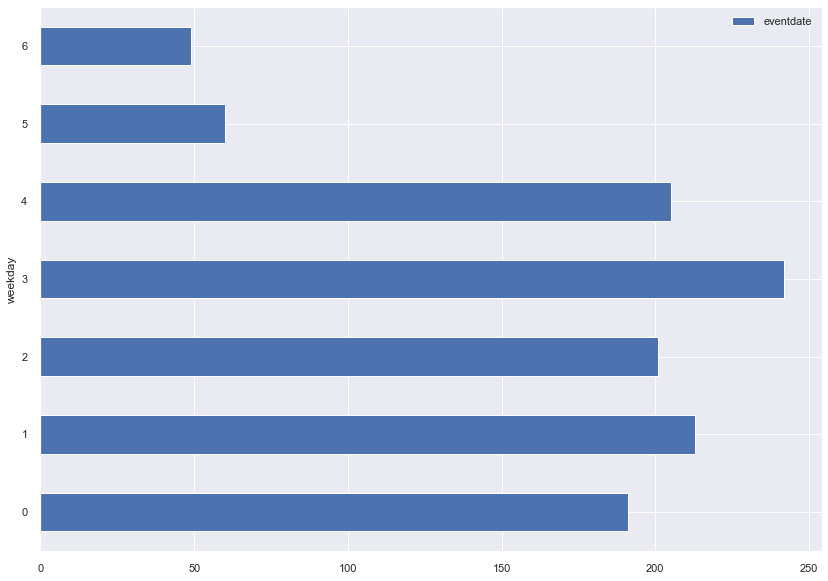

In [88]:
# Histogram for Weekday wise Incidents
weekwise_total = incidents[["eventdate"]].groupby(incidents["weekday"]).count()
weekwise_total.plot.barh()
del(weekwise_total)
# Here, for weekdays 0 is for Monday and 6 is for Sunday.

### The charts above shows that WEDNESDAY has the highest frequency of nuclear incidents. Although the chart below shows that, on an average, Most incidents occur on TUESDAYS and THURSDAYS of the week. We may need to find out why this is the case

In [89]:
tempdf1 = incidents.groupby(['year', 'weekday']).agg({'weekday' : 'count'}).rename(columns={'weekday' : 'weekday_count'}).reset_index()
aggregated = tempdf1.groupby(['weekday']).agg({'weekday_count' : 'mean'})

x2 = aggregated.index.tolist()
y2 = aggregated.weekday_count.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
x2 = [weekmap[x] for x in x2]
wkmp = {}
for j,x in enumerate(x2):
    wkmp[x] = y2[j]
order = list(weekmap.values())
ordervals = [wkmp[val] for val in order]

trace1 = go.Bar(x=order, y=ordervals, opacity=0.75, name="weekday", marker=dict(color='rgba(61, 60, 250, 0.6)'))
layout = dict(height=400, title='Average number of Incidents by Day of the Week', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')

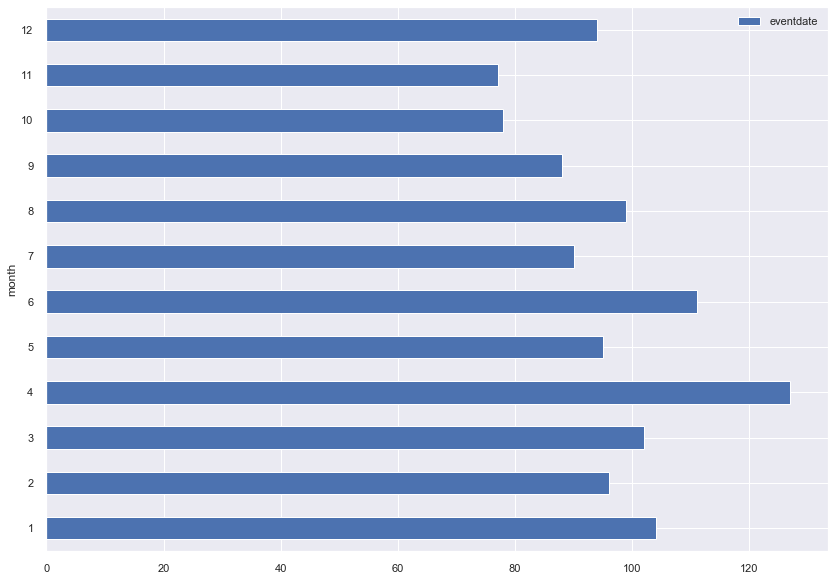

In [90]:
# Histogram for Month wise Incidents
monthwise_total = incidents[["eventdate"]].groupby(incidents["month"]).count()
monthwise_total.plot.barh()
del(monthwise_total)
# Here, for months 1 is for January and 12 is for December.

### The charts above and below show that APRIL has the highest average number of incidents

In [99]:
tempdf = incidents[incidents['year'].isin(['2013','2014','2015','2016','2017','2018','2019'])]
tempdf1 = tempdf.groupby(['year','month']).agg({'month' : 'count'}).rename(columns={'month': 'month_count'}).reset_index()
aggregated = tempdf1.groupby(['month']).agg({'month_count' : 'mean'})
x2 = aggregated.index.tolist()
y2 = aggregated.month_count.tolist()
mapp = {}
for m,v in zip(x2, y2):
    mapp[m] = v
xn = [calendar.month_abbr[int(x)] for x in sorted(x2)]
vn = [mapp[x] for x in sorted(x2)]

trace1 = go.Bar(x=xn, y=vn, opacity=0.75, name="month", marker=dict(color='rgba(100, 20, 10, 0.6)'))
layout = dict(height=400, title='Average number of Radioactive Incidents by Month from 1983 to 2019', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')

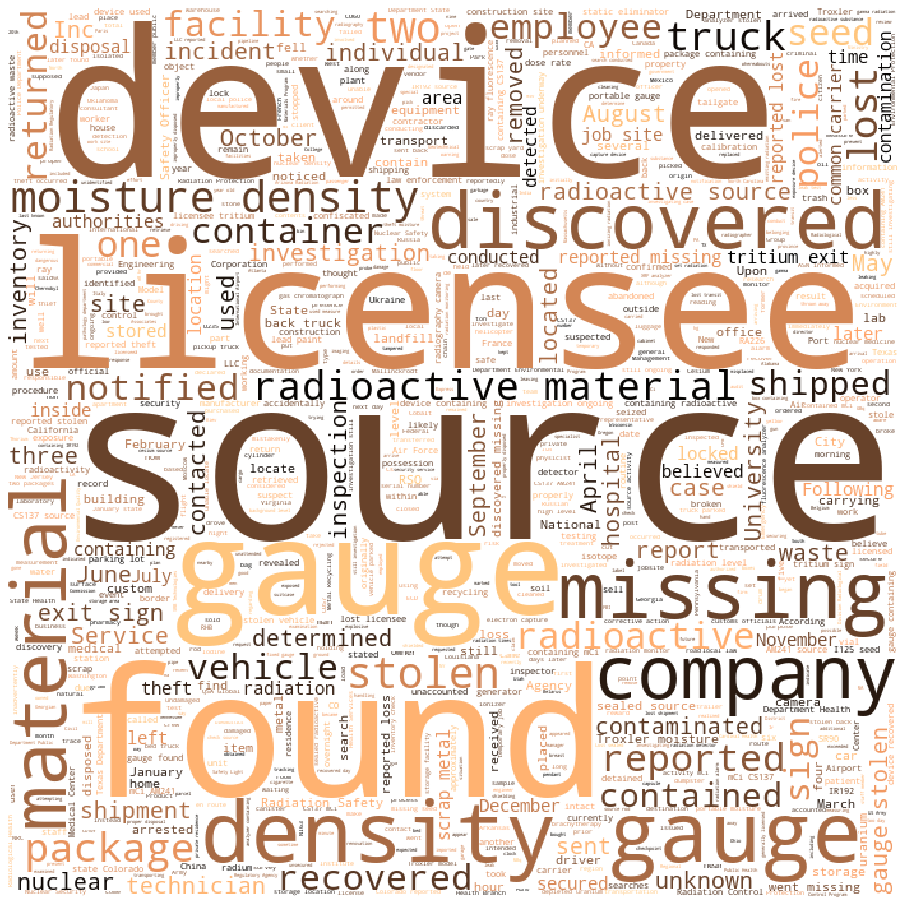

In [92]:
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS
mask = np.array(Image.open('radiation.jpg'))
txt = " ".join(incidents['Brief Description'].dropna())
wc = WordCloud(mask=mask, max_words=1200, stopwords=STOPWORDS, colormap='copper', background_color='White').generate(txt)
plt.figure(figsize=(16,18))
plt.imshow(wc)
plt.axis('off')
plt.title('');

### The above word cloud depicts that most number of incidents are reported involve DENSITY GAUGE, SOURCE, LICENCEE AND DEVICE. 

Text(0.5, 1.0, 'Top 10 States having high Radioactive incident rate')

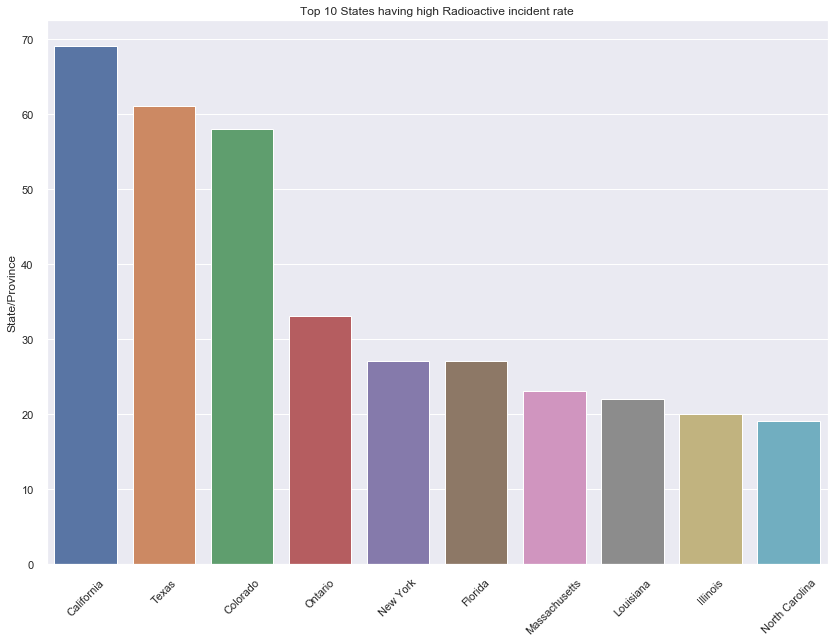

In [94]:
# Histogram showing the the top 10 cities with high crime rate
city_vs_radioactiverate=incidents['State/Province'].value_counts().head(10)
city_vs_radioactiverate=sns.barplot(x=city_vs_radioactiverate.index,y=city_vs_radioactiverate)
city_vs_radioactiverate.set_xticklabels(city_vs_radioactiverate.get_xticklabels(),rotation=45)
city_vs_radioactiverate.set_title("Top 10 States having high Radioactive incident rate")

### The above chart shows that the state of California has the highest number of radioactive incidents from 2013 to 2019. 

C:\Users\cv1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



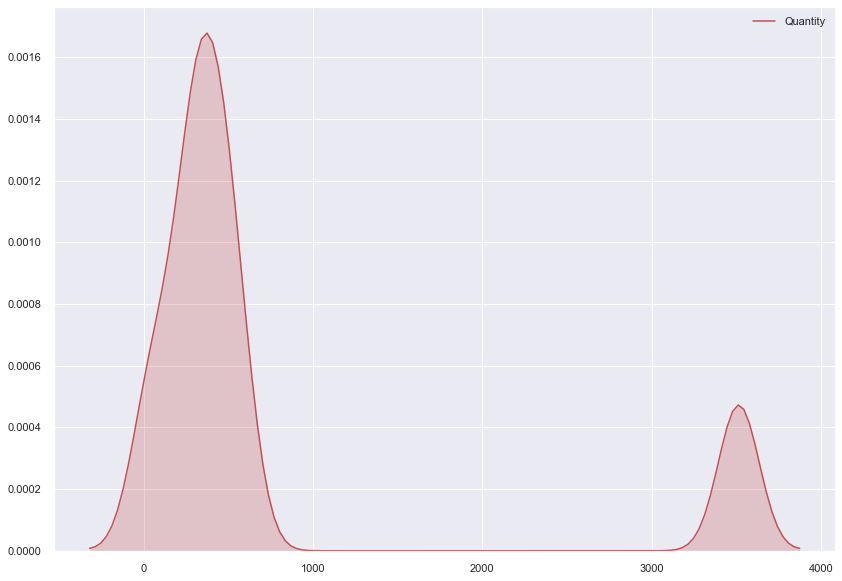

In [95]:
# Density plot for Quantity on all weekdays
Quantity_weektotal = incidents[["Quantity"]].groupby(incidents["weekday"]).sum()
dp_Quantity_plot=sns.kdeplot(Quantity_weektotal['Quantity'], shade=True, color="r")
#dp_inj_kill_plot=sns.kdeplot(inj_kill_weektotal['kiltotal'], shade=True, color="b")
#del(inj_kill_weektotal)

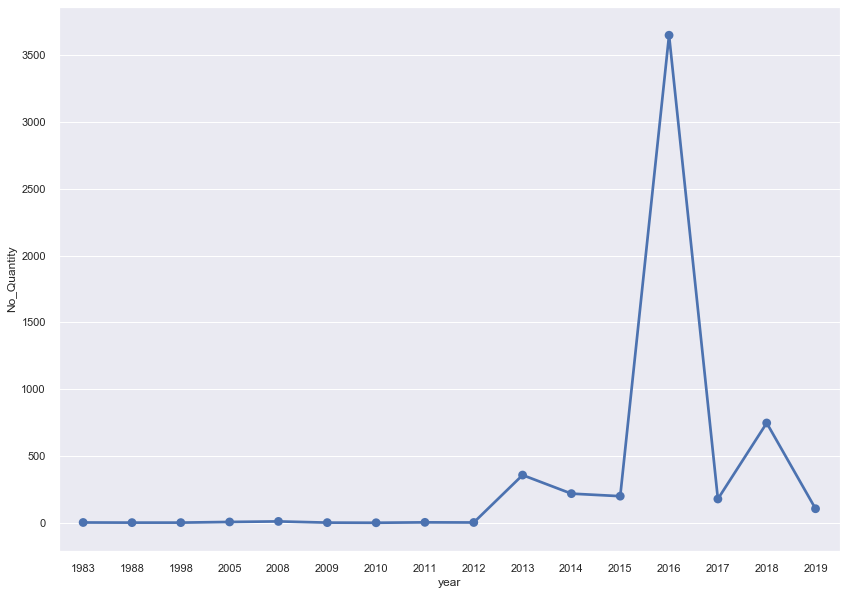

In [96]:
# Point plot showing yearly no of persons Killed 
yearly_vs_Quantity=incidents.groupby(incidents["year"]).apply(lambda x: pd.Series(dict(No_Quantity=x.Quantity.sum())))
yearly_vs_Quantity_plot=sns.pointplot(x=yearly_vs_Quantity.index, y=yearly_vs_Quantity.No_Quantity, data=yearly_vs_Quantity,label="yearly_vs_Quantity")

### From the chart above, there is a sharp rise in number of radioactive incidents from 2015 to 2016 followed by a steep drop in 2017

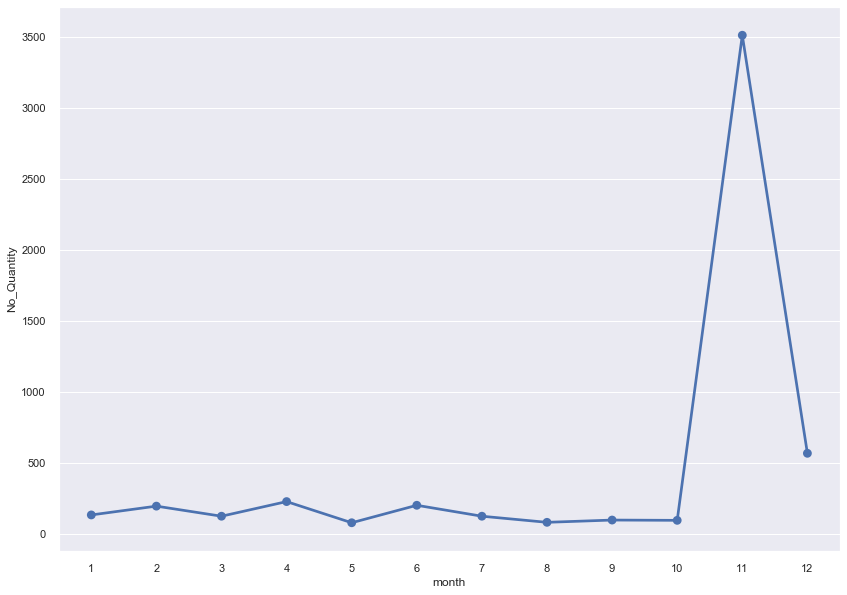

In [97]:
# Point plot showing monthly number of Quantity
monthly_vs_Quantity=incidents.groupby(incidents["month"]).apply(lambda x: pd.Series(dict(No_Quantity=x.Quantity.sum())))
monthly_vs_Quantity_plot=sns.pointplot(x=monthly_vs_Quantity.index, y=monthly_vs_Quantity.No_Quantity, data=monthly_vs_Quantity,label="monthly_vs_Quantity")

Text(0.5, 1.0, 'Radioactive incidents per Year')

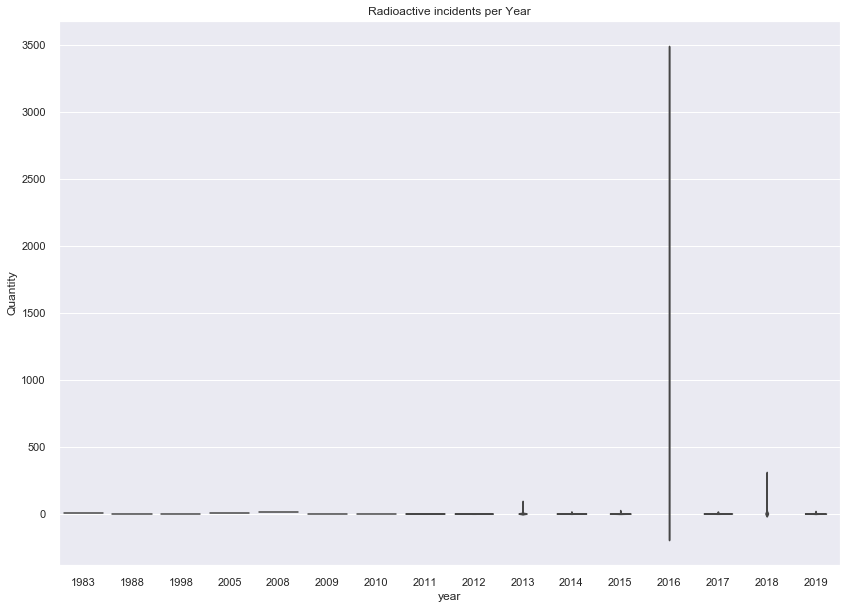

In [101]:
# Violin Plot for Year wise no of Quantity
year_vs_Quantity_plot = sns.violinplot("year", "Quantity", data=incidents,split=True, inner="quartile")
year_vs_Quantity_plot.set_title("Radioactive incidents per Year")

In [103]:
# State Vs Quantity
statewise_vs_Quantity=incidents.groupby(incidents["State/Province"]).apply(lambda x: pd.Series(dict(No_Quantity=x.Quantity.sum())))

Text(0.5, 1.0, 'Quantity per month')

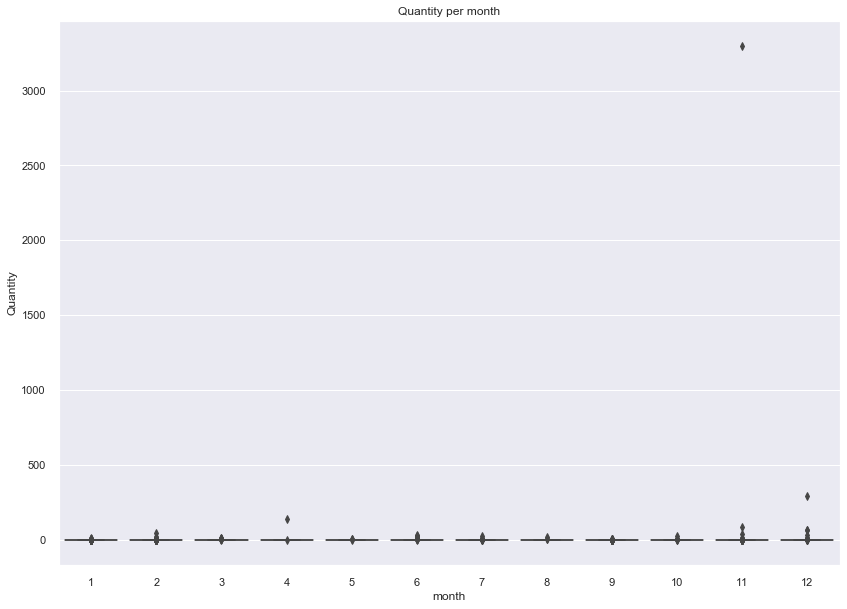

In [104]:
# Box Plot for Monthwise total Quantity
monthwise_killed_plot = sns.boxplot("month", "Quantity", data= incidents)
monthwise_killed_plot.set_title("Quantity per month")

Text(0.5, 1.0, 'Person injured in incidents per month')

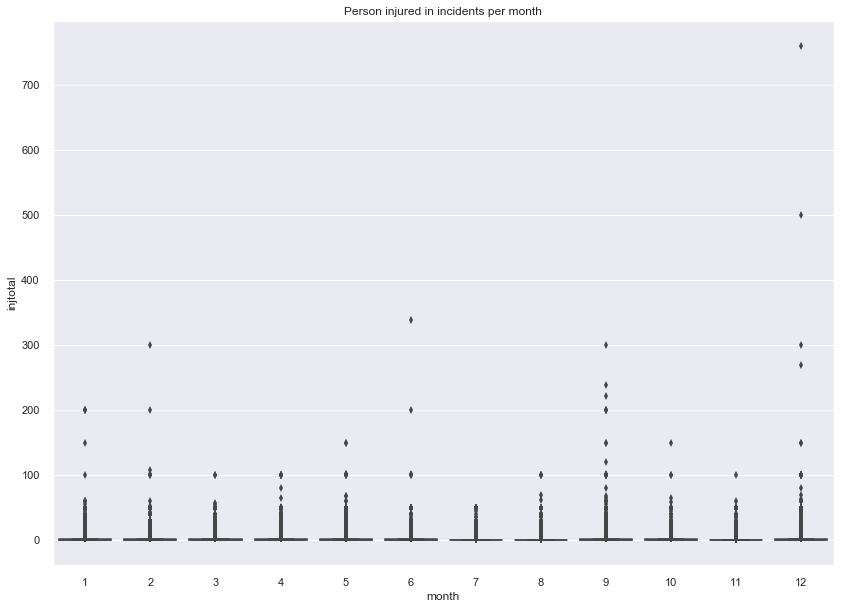

In [52]:
# Box Plot for Monthwise total number of Persons Injured
month_injured_plot = sns.boxplot("month", "injtotal", data= incidents)
month_injured_plot.set_title("Person injured in incidents per month")